<a href="https://colab.research.google.com/github/Abhirup2/Multi-Class-Cyber-Attack-Detection-Using-Ensemble-Learning/blob/main/XAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module-1: Data Validation And Preprocessing by each attack**

In [ ]:
import pandas as p
import numpy as n

defining all columns of the dataset

In [ ]:
features = ["duration", "protocol_type", "service", "flag", "src_bytes",
"dst_bytes", "land", "Wrong_fragment", "Urgent", "hot", "num_failed_login",
"logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
"num_file_creations", "num_shells", "num_access_files",
"num_outbound_cmds", "is_host_login", "is_guest_login", "count",
"srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
"same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
"dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_ srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host _rate",
"dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label", "last_flag"]

Read the dataset using pandas p object

In [ ]:
data =p.read_csv("/content/dataset.csv", names = features)


In [ ]:
df=data.dropna()
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,Wrong_fragment,Urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_ srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host _rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


showing all columns

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'Wrong_fragment', 'Urgent', 'hot',
       'num_failed_login', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_ srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host _rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'last_flag'],
      dtype='object')

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,Wrong_fragment,Urgent,hot,num_failed_login,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_ srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host _rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


no of rows and cols

In [ ]:
df.shape

(148517, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      148517 non-null  int64  
 1   protocol_type                 148517 non-null  object 
 2   service                       148517 non-null  object 
 3   flag                          148517 non-null  object 
 4   src_bytes                     148517 non-null  int64  
 5   dst_bytes                     148517 non-null  int64  
 6   land                          148517 non-null  int64  
 7   Wrong_fragment                148517 non-null  int64  
 8   Urgent                        148517 non-null  int64  
 9   hot                           148517 non-null  int64  
 10  num_failed_login              148517 non-null  int64  
 11  logged_in                     148517 non-null  int64  
 12  num_compromised               148517 non-nul

In [ ]:
print('Label distribution\n')
print(df['label'].value_counts())

Label distribution

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
land                  25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
worm                   2
sqlattack              2
udpstorm               2
spy  

In [ ]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique} categories".format(col_name=col_name, unique=unique))

Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 40 categories


In [ ]:
print(df['protocol_type'].value_counts().sort_values(ascending=False).head(30))
print('\n')
print(df['label'].value_counts().sort_values(ascending=False).head(30))
print('\n')
print(df['flag'].value_counts().sort_values(ascending=False).head(30))
print('\n')
print(df['service'].value_counts().sort_values(ascending=False).head(30))
print('\n')

tcp     121569
udp      17614
icmp      9334
Name: protocol_type, dtype: int64


normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
Name: label, dtype: int64


SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          1

<Axes: xlabel='protocol_type'>

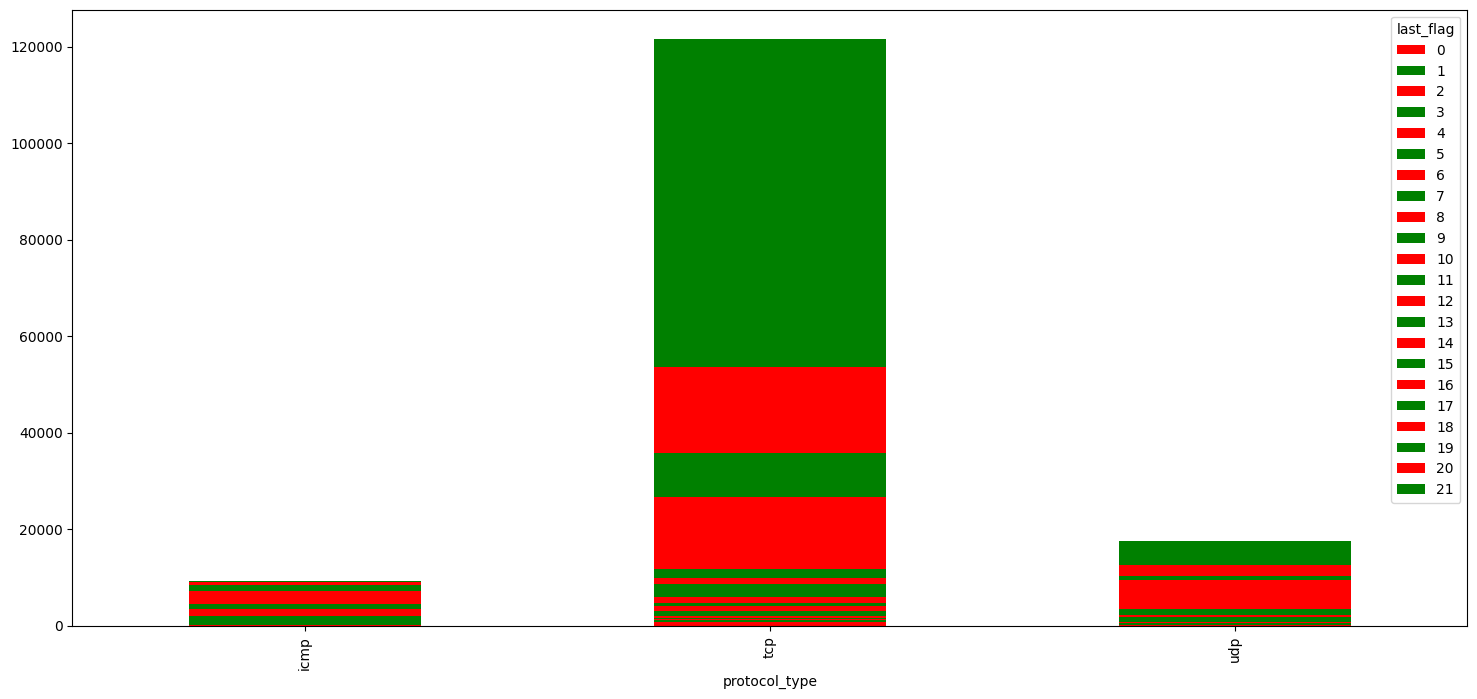

In [ ]:
d =p.crosstab(df['protocol_type'], df['last_flag'])
d.plot(kind='bar', stacked=True, color=['red','green'], grid=False,
figsize=(18,8))

In [ ]:
import matplotlib.pyplot as plt

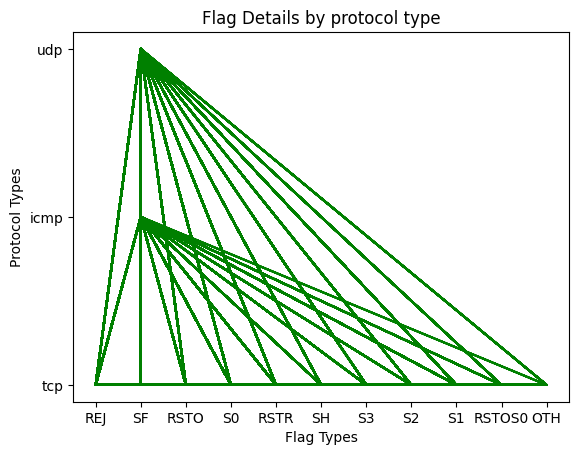

In [ ]:
pr =df["protocol_type"]
fl=df["flag"]
plt.plot(fl, pr, color='g')
plt.xlabel('Flag Types')
plt.ylabel('Protocol Types')
plt.title('Flag Details by protocol type')
plt.show()

tcp     81.86
udp     11.86
icmp     6.28
Name: protocol_type, dtype: float64

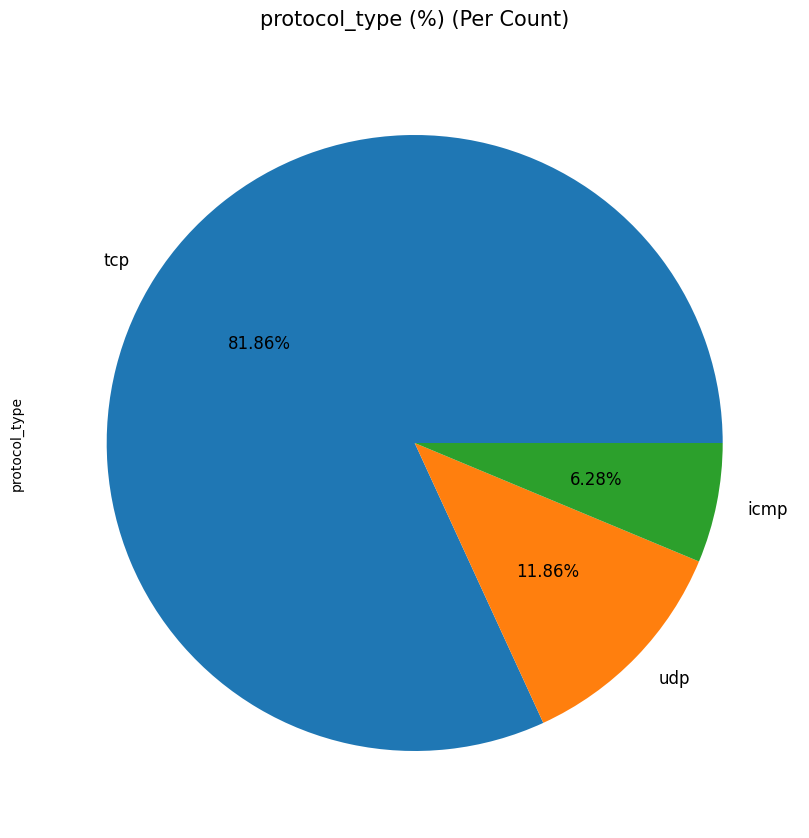

In [ ]:
import numpy as  n
def PropByVar(df, variable):
    dataframe_pie=df[variable].value_counts()
    ax =dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize=
    12);
    ax.set_title(variable + ' (%) (Per Count)\n', fontsize= 15);
    return n.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'protocol_type')

#**Module-2: Prediction Of DDOS Attacks**





get the categorical values into a numpy array

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

categorical_columns=['protocol_type', 'service', 'flag']

 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
df_categorical_values.head(10)

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO
5,tcp,http,SF
6,tcp,smtp,SF
7,tcp,telnet,SF
8,tcp,http,SF
9,tcp,ftp,SF


add prefixes

In [ ]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

transform categorical values into numerical labels using LabelEncoder

In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head(30))

    protocol_type  service  flag
0               1       49     1
1               1       49     1
2               1       20     9
3               0       14     9
4               1       60     2
5               1       24     9
6               1       54     9
7               1       60     9
8               1       24     9
9               1       19     9
10              1       60     9
11              1       54     9
12              1       49     1
13              1       60     5
14              1       60     9
15              1       24     9
16              1       24     9
17              1       24     9
18              2       49     9
19              1       49     1
20              1       32     1
21              1       47     5
22              1       24     9
23              1       24     9
24              1        6     1
25              1       10     2
26              1       24     9
27              1       24     9
28              0       15     9
29        

Binary columnss for each category

In [ ]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = p.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)

df_cat_data.head(10)

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

print(newdf.shape)

(148517, 124)


In [ ]:
# take label column
labeldf=newdf['label']

# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# Update the 'label' column in the original DataFrame 'newdf'
newdf['label'] = newlabeldf
# Convert the 'label' column to integer type
newdf['label'] = newdf['label'].astype(int)
print(newdf['label'].head(30))

0     1
1     1
2     0
3     2
4     2
5     0
6     0
7     3
8     0
9     3
10    2
11    0
12    1
13    1
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    2
22    0
23    0
24    1
25    1
26    0
27    0
28    1
29    0
Name: label, dtype: int64


In [ ]:
newdf.to_csv('/content/dataset.csv',index=False)
print(p.unique(newdf['label']))

[1 0 2 3 4]


In [ ]:
from sklearn.model_selection import train_test_split
X = newdf.drop('label',axis=1)
y = newdf.label
X.to_csv('/content/dataset.csv', index=False)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)


In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(99506, 123)
(49011, 123)
(99506,)
(49011,)


##**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn import tree
dtc_classifier = tree.DecisionTreeClassifier()
import seaborn as sns

In [ ]:
dtc_classifier.fit(X_train.values,y_train)


DecisionTreeClassifier()

In [ ]:

pred = dtc_classifier.predict(X_test)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, ..., 2, 2, 4])

In [ ]:
dtc_classifier.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9968578482381506

In [ ]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test,pred)
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 99.69%



In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25511
           1       1.00      1.00      1.00     17587
           2       0.99      0.99      0.99      4610
           3       0.97      0.98      0.97      1268
           4       0.53      0.57      0.55        35

    accuracy                           1.00     49011
   macro avg       0.90      0.91      0.90     49011
weighted avg       1.00      1.00      1.00     49011



Visualize the confusion matrix using sea born

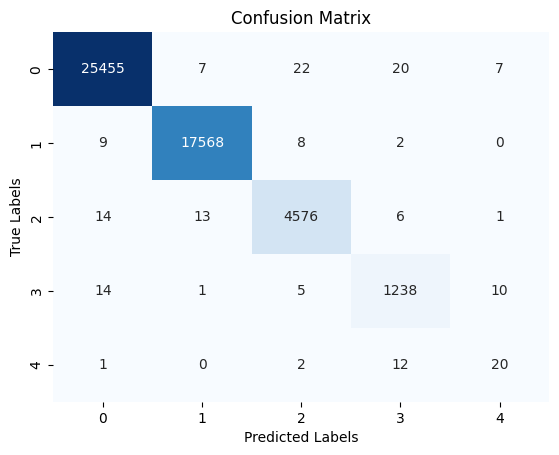

In [ ]:
# Confusion Matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pickle

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the trained Decision Tree classifier using pickle to a local path within Google Drive
with open("/content/drive/My Drive/Decision_Tree.pkl", "wb") as fout:
    pickle.dump(dtc_classifier, fout)

print("Decision Tree Classifier Model Saved")



Mounted at /content/drive
Decision Tree Classifier Model Saved


##**Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression()

In [ ]:
logreg_classifier.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = logreg_classifier.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
print('Score',logreg_classifier.score(X_test,y_test))


Score 0.8115117014547755


In [ ]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test,pred)
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 81.15%



In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     25511
           1       0.81      0.90      0.85     17587
           2       0.01      0.00      0.00      4610
           3       0.00      0.00      0.00      1268
           4       0.00      0.00      0.00        35

    accuracy                           0.81     49011
   macro avg       0.33      0.37      0.35     49011
weighted avg       0.72      0.81      0.76     49011



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


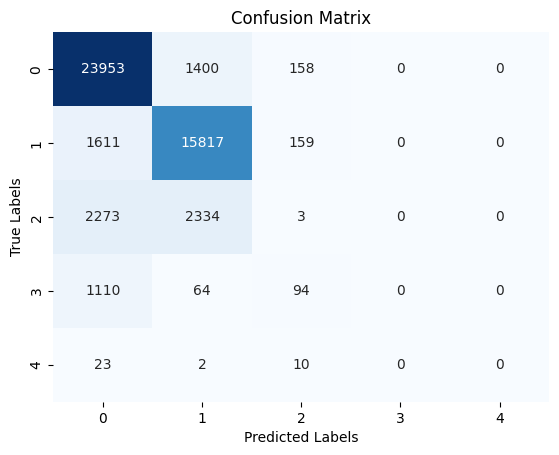

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pickle

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the trained Logistic Regression classifier using pickle to a local path within Google Drive
with open("/content/drive/My Drive/Logistic_Regression.pkl", "wb") as fout:
    pickle.dump(logreg_classifier, fout)

print("Logistic Regression Classifier Model Saved")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Logistic Regression Classifier Model Saved


##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()

In [ ]:
rfc_classifier.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
pred = rfc_classifier.predict(X_test)
pred

array([1, 0, 0, ..., 2, 2, 0])

In [ ]:
print('Score',rfc_classifier.score(X_test,y_test))


Score 0.9985921527820285


In [ ]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test,pred)
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 99.86%



In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25511
           1       1.00      1.00      1.00     17587
           2       1.00      1.00      1.00      4610
           3       0.99      0.99      0.99      1268
           4       0.86      0.69      0.76        35

    accuracy                           1.00     49011
   macro avg       0.97      0.93      0.95     49011
weighted avg       1.00      1.00      1.00     49011



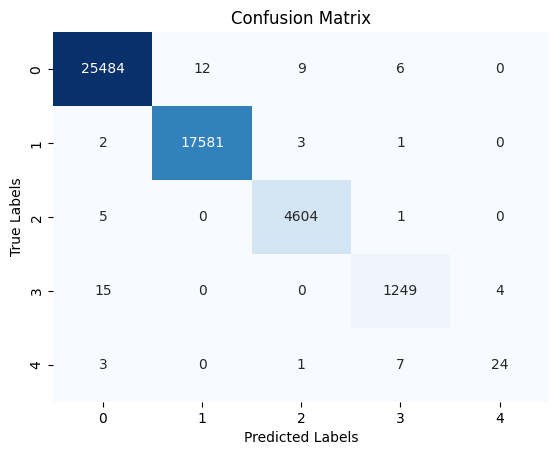

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pickle

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the trained Random Forest classifier using pickle to a local path within Google Drive
with open("/content/drive/My Drive/Random_Forest.pkl", "wb") as fout:
    pickle.dump(rfc_classifier, fout)

print("Random Forest Classifier Model Saved")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Classifier Model Saved


#**KNN Classifier**#

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
pred = knn_classifier.predict(X_test)
pred
print('Score',knn_classifier.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,pred)
cm

Score 0.9906143518801902


array([[25419,    22,    50,    19,     1],
       [   39, 17529,    19,     0,     0],
       [   68,   138,  4397,     7,     0],
       [   59,     2,     9,  1197,     1],
       [   23,     0,     1,     2,     9]])

In [ ]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test,pred)
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 99.06%



KNN Classifier Model Saved


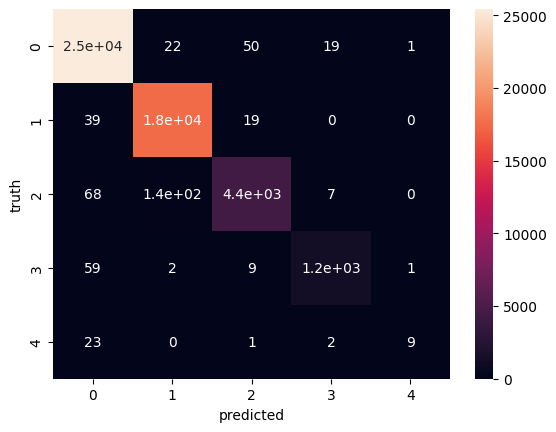

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')


with open("/content/drive/My Drive/KNN.pkl","wb") as fout:
  pickle.dump(knn_classifier, fout)

print("KNN Classifier Model Saved")

#**Multinomial Naive Bayes**#

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
pred = nb_classifier.predict(X_test)
pred
print('nb_classifier_Score',nb_classifier.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,pred)
cm

nb_classifier_Score 0.4497765807675828


array([[ 5081, 10329,   639,    60,  9402],
       [    2, 16932,   373,   280,     0],
       [   10,  4580,     1,     0,    19],
       [   41,   940,   108,     0,   179],
       [    0,     4,     1,     0,    30]])

In [ ]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test,pred)
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 44.98%



Multinomial Naive Bayes Classifier Model Saved


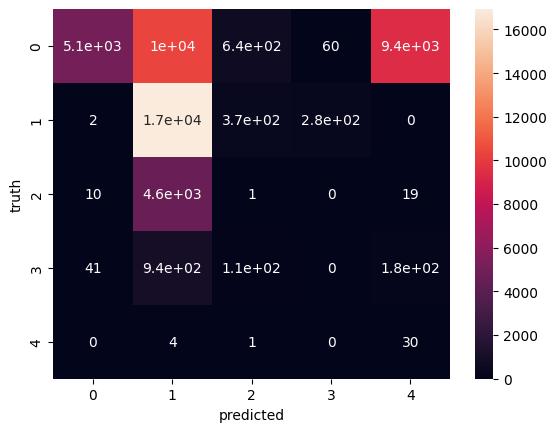

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

with open("/content/drive/My Drive/nb_classifier.pkl","wb") as fout:
  pickle.dump(nb_classifier, fout)

print("Multinomial Naive Bayes Classifier Model Saved")

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model parameters
model_params = {
    'tree': {
        'model': tree.DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'multinomial_nb': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0, 2.0]  # Example values for alpha
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 10],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']
        }
    }

}


In [ ]:
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"{model_name}:")
    print(f"Best Parameters: {clf.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print("="*30)

tree:
Best Parameters: {'criterion': 'entropy', 'splitter': 'random'}
Accuracy: 0.9974
random_forest:
Best Parameters: {'n_estimators': 10}
Accuracy: 0.9980
multinomial_nb:
Best Parameters: {'alpha': 0.1}
Accuracy: 0.4500


KeyboardInterrupt: 

#**Ensemble Learning**

In [ ]:
import pandas as pd
import pickle
import keras
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
keras.__version__


'2.15.0'

In [ ]:
features = ["duration", "protocol_type", "service", "flag", "src_bytes",
"dst_bytes", "land", "Wrong_fragment", "Urgent", "hot", "num_failed_login",
"logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
"num_file_creations", "num_shells", "num_access_files",
"num_outbound_cmds", "is_host_login", "is_guest_login", "count",
"srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
"same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
"dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_ srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host _rate",
"dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
"dst_host_srv_rerror_rate", "label", "last_flag"]

In [ ]:
test = pd.read_csv('/content/test.csv' ,names = features)

In [ ]:
print(test.iloc[4892]["label"])


land


In [ ]:
test.shape

(22544, 43)

In [ ]:
test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,Wrong_fragment,Urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_ srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host _rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

categorical_columns=['protocol_type', 'service', 'flag']

 # Get the categorical values into a 2D numpy array
test_categorical_values = test[categorical_columns]
test_categorical_values.head(20)

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO
5,tcp,http,SF
6,tcp,smtp,SF
7,tcp,telnet,SF
8,tcp,http,SF
9,tcp,ftp,SF


In [ ]:
# protocol type
unique_protocol=sorted(test.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# service
unique_service=sorted(test.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

# flag
unique_flag=sorted(test.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

In [ ]:
test_categorical_values_enc=test_categorical_values.apply(LabelEncoder().fit_transform)
print(test_categorical_values_enc.head(10))

   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2
5              1       22     9
6              1       49     9
7              1       55     9
8              1       22     9
9              1       18     9


In [ ]:
enc = OneHotEncoder()
test_categorical_values_encenc = enc.fit_transform(test_categorical_values_enc)
test_cat_data = pd.DataFrame(test_categorical_values_encenc.toarray(),columns=dumcols)
# Columns to add
columns_to_add = ['service_urh_i', 'service_harvest', 'service_aol', 'service_http_2784', 'service_http_8001', 'service_red_i']

# Add columns with values 0
test_cat_data = test_cat_data.assign(**{col: 0 for col in columns_to_add})


test_cat_data.head(10)

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_harvest,service_aol,service_http_2784,service_http_8001,service_red_i
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0


In [ ]:
testdf=test.join(test_cat_data)
testdf.drop('flag', axis=1, inplace=True)
testdf.drop('protocol_type', axis=1, inplace=True)
testdf.drop('service', axis=1, inplace=True)

print(testdf.shape)

(22544, 124)


In [ ]:
testdf.head(10)

,duration,src_bytes,dst_bytes,land,Wrong_fragment,Urgent,hot,num_failed_login,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_harvest,service_aol,service_http_2784,service_http_8001,service_red_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,0,267,14515,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
6,0,1022,387,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
7,0,129,174,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
8,0,327,467,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
9,0,26,157,0,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0


In [ ]:
# take label column
labeldf=testdf['label']

# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# Update the 'label' column in the original DataFrame 'newdf'
testdf['label'] = newlabeldf
# Convert the 'label' column to integer type
testdf['label'] = testdf['label'].astype(int)
print(testdf['label'].head(30))

0     1
1     1
2     0
3     2
4     2
5     0
6     0
7     3
8     0
9     3
10    2
11    0
12    1
13    1
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    2
22    0
23    0
24    1
25    1
26    0
27    0
28    1
29    0
Name: label, dtype: int64


In [ ]:
print(pd.unique(testdf['label']))

[1 0 2 3 4]


In [ ]:
testdf.to_csv('/content/test.csv',index=False)

In [ ]:
testdf.head(1)

,duration,src_bytes,dst_bytes,land,Wrong_fragment,Urgent,hot,num_failed_login,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_urh_i,service_harvest,service_aol,service_http_2784,service_http_8001,service_red_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [ ]:
testdf = testdf.drop('label', axis = 1)

Importing pre-trained models

In [ ]:
#!pip install tensorflow
#import pickle
#import tensorflow as tf

with open("/content/Decision_Tree.pkl", "rb") as fin:
    dtc_classifier = pickle.load(fin)

with open("/content/Logistic_Regression.pkl", "rb") as fin:
    logreg_classifier = pickle.load(fin)

with open("/content/Random_Forest.pkl", "rb") as fin:
    rfc_classifier = pickle.load(fin)

with open("/content/KNN.pkl", "rb") as fin:
    knn_classifier = pickle.load(fin)

with open("/content/nb_classifier.pkl", "rb") as fin:
    nb_classifier = pickle.load(fin)

print("SUCCESS ALL MODELS LOADED")

SUCCESS ALL MODELS LOADED


In [ ]:
# Assuming all classifiers are already loaded and defined

# Make predictions using each classifier
pred_dtc = dtc_classifier.predict(sample)
pred_logreg = logreg_classifier.predict(sample)
pred_rfc = rfc_classifier.predict(sample)
pred_knn = knn_classifier.predict(sample)
pred_nb = nb_classifier.predict(sample)

# Print individual predictions
print("Decision Tree Prediction:", pred_dtc)
print("Logistic Regression Prediction:", pred_logreg)
print("Random Forest Prediction:", pred_rfc)
print("KNN Prediction:", pred_knn)
print("Naive Bayes Prediction:", pred_nb)


Decision Tree Prediction: [0]
Logistic Regression Prediction: [0]
Random Forest Prediction: [0]
KNN Prediction: [0]
Naive Bayes Prediction: [2]


In [ ]:
def ensemble(x):
  pred1 = dtc_classifier.predict_proba(x)
  pred2 = knn_classifier.predict_proba(x)
  pred3 = logreg_classifier.predict_proba(x)
  pred4 = nb_classifier.predict_proba(x)
  pred5 = rfc_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5], axis=0)
  predsk = np.argmax(test_pred_prob, axis=1)


  return predsk

attack = [['Normal'],['neptune','back','land','pod','smurf','teardrop','mailbomb','apache2','processtable','udpstorm','worm'],
          ['ipsweep','nmap','portsweep','satan','mscan','saint'],
          ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster','sendmail','named','snmpgetattack','snmpguess','xlock','xsnoop','httptunnel'],
          ['buffer_overflow','loadmodule','perl','rootkit','ps','sqlattack','xterm']]


In [ ]:
def final(preds):
  attack = [['Normal'],['neptune','back','land','pod','smurf','teardrop','mailbomb','apache2','processtable','udpstorm','worm'],
          ['ipsweep','nmap','portsweep','satan','mscan','saint'],
          ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster','sendmail','named','snmpgetattack','snmpguess','xlock','xsnoop','httptunnel'],
          ['buffer_overflow','loadmodule','perl','rootkit','ps','sqlattack','xterm']]

  preds = np.squeeze(preds)
  if preds == 0:
    return str("THERE IS NO ATTACK DETECTED OR ") + str(attack[0])
  elif preds == 1:
    return str("DDoS Attack Detected and it could be possibly any of them ") + str(attack[1])
  elif preds == 2:
    return str("U2R Attack Detected and it could be possibly any of them ") + str(attack[2])
  elif preds == 3:
    return str("R2L Attack Detected and it could be possibly any of them ") + str(attack[3])
  else:
    return str("Probe Attack Detected and it could be possibly any of them ") + str(attack[4])

In [ ]:
sample = testdf[2:3].values
print(sample)

[[2.0000e+00 1.2983e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.3400e+02 8.6000e+01
  6.1000e-01 4.0000e-02 6.1000e-01 2.0000e-02 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 2.1000e+01 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.

**Single Input Prediction**

In [ ]:
prediction1  = ensemble(sample)
print("PREDICTION FROM ENSEMBLE MODEL")
temp1 = final(prediction1)
print(temp1)

PREDICTION FROM ENSEMBLE MODEL
THERE IS NO ATTACK DETECTED OR ['Normal']


**Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define base classifiers
classifiers = [dtc_classifier, logreg_classifier, rfc_classifier, knn_classifier, nb_classifier]

# Initialize AdaBoost Classifier with DecisionTreeClassifier as base estimator
ada_boost_ensemble = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5, random_state=42)

# Train AdaBoost Ensemble
ada_boost_ensemble.fit(X_train, y_train)

# Make predictions
predictions = ada_boost_ensemble.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Define the base classifiers
classifiers = [dtc_classifier, knn_classifier, logreg_classifier, nb_classifier, rfc_classifier]

# Initialize the BaggingClassifier
bagging_ensemble = BaggingClassifier(base_estimator=None, n_estimators=5, random_state=42)

# Train the BaggingClassifier on your training data
bagging_ensemble.fit(X_train, y_train)

# Make predictions on new data
predictions = bagging_ensemble.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
